## Where to start:

Ridge Regressions for feature importance. We want to show that when we penalize larger coefficients, under fitting does not occur. This would allow us to identify "significant predictors". 

In [4]:
import pandas as pd

churn_train = pd.read_csv("../data/raw/train.csv")
churn_test = pd.read_csv("../data/raw/test.csv")

          CustomerID            Age         Tenure  Usage Frequency  \
count  303124.000000  303124.000000  241103.000000    303124.000000   
mean   252365.776715      38.444178      31.530657        15.954088   
std    145860.674838      11.669331      17.206895         8.536377   
min         1.000000      18.000000       1.000000         1.000000   
25%    125964.750000      29.000000      17.000000         9.000000   
50%    252101.500000      39.000000      32.000000        16.000000   
75%    378554.250000      47.000000      46.000000        23.000000   
max    505205.000000      65.000000      60.000000        30.000000   

       Payment Delay    Total Spend  Last Interaction          Churn  
count  214800.000000  303124.000000     240574.000000  303124.000000  
mean       10.258073     667.087312         14.051415       0.299999  
std         6.564950     223.225242          8.526133       0.458258  
min         0.000000     100.000000          1.000000       0.000000  
25%  

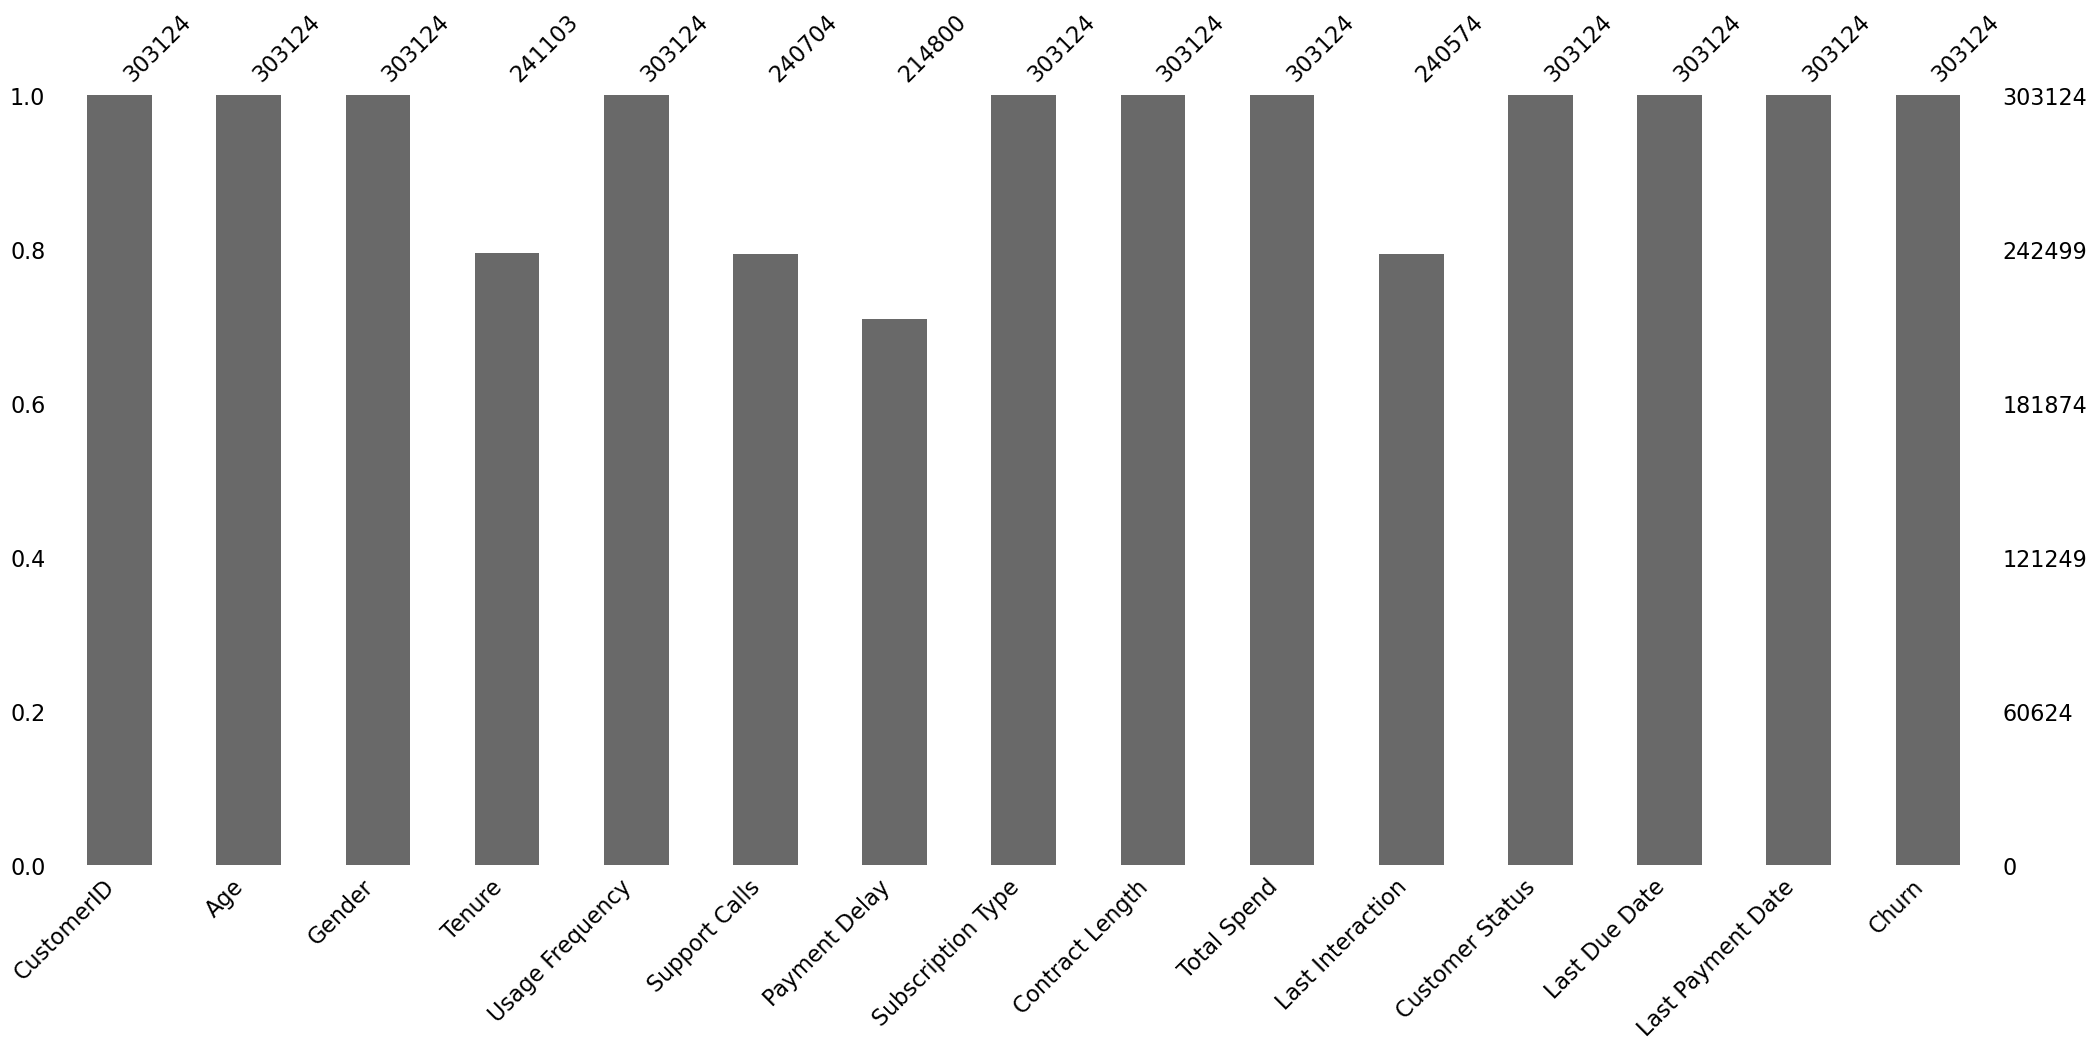

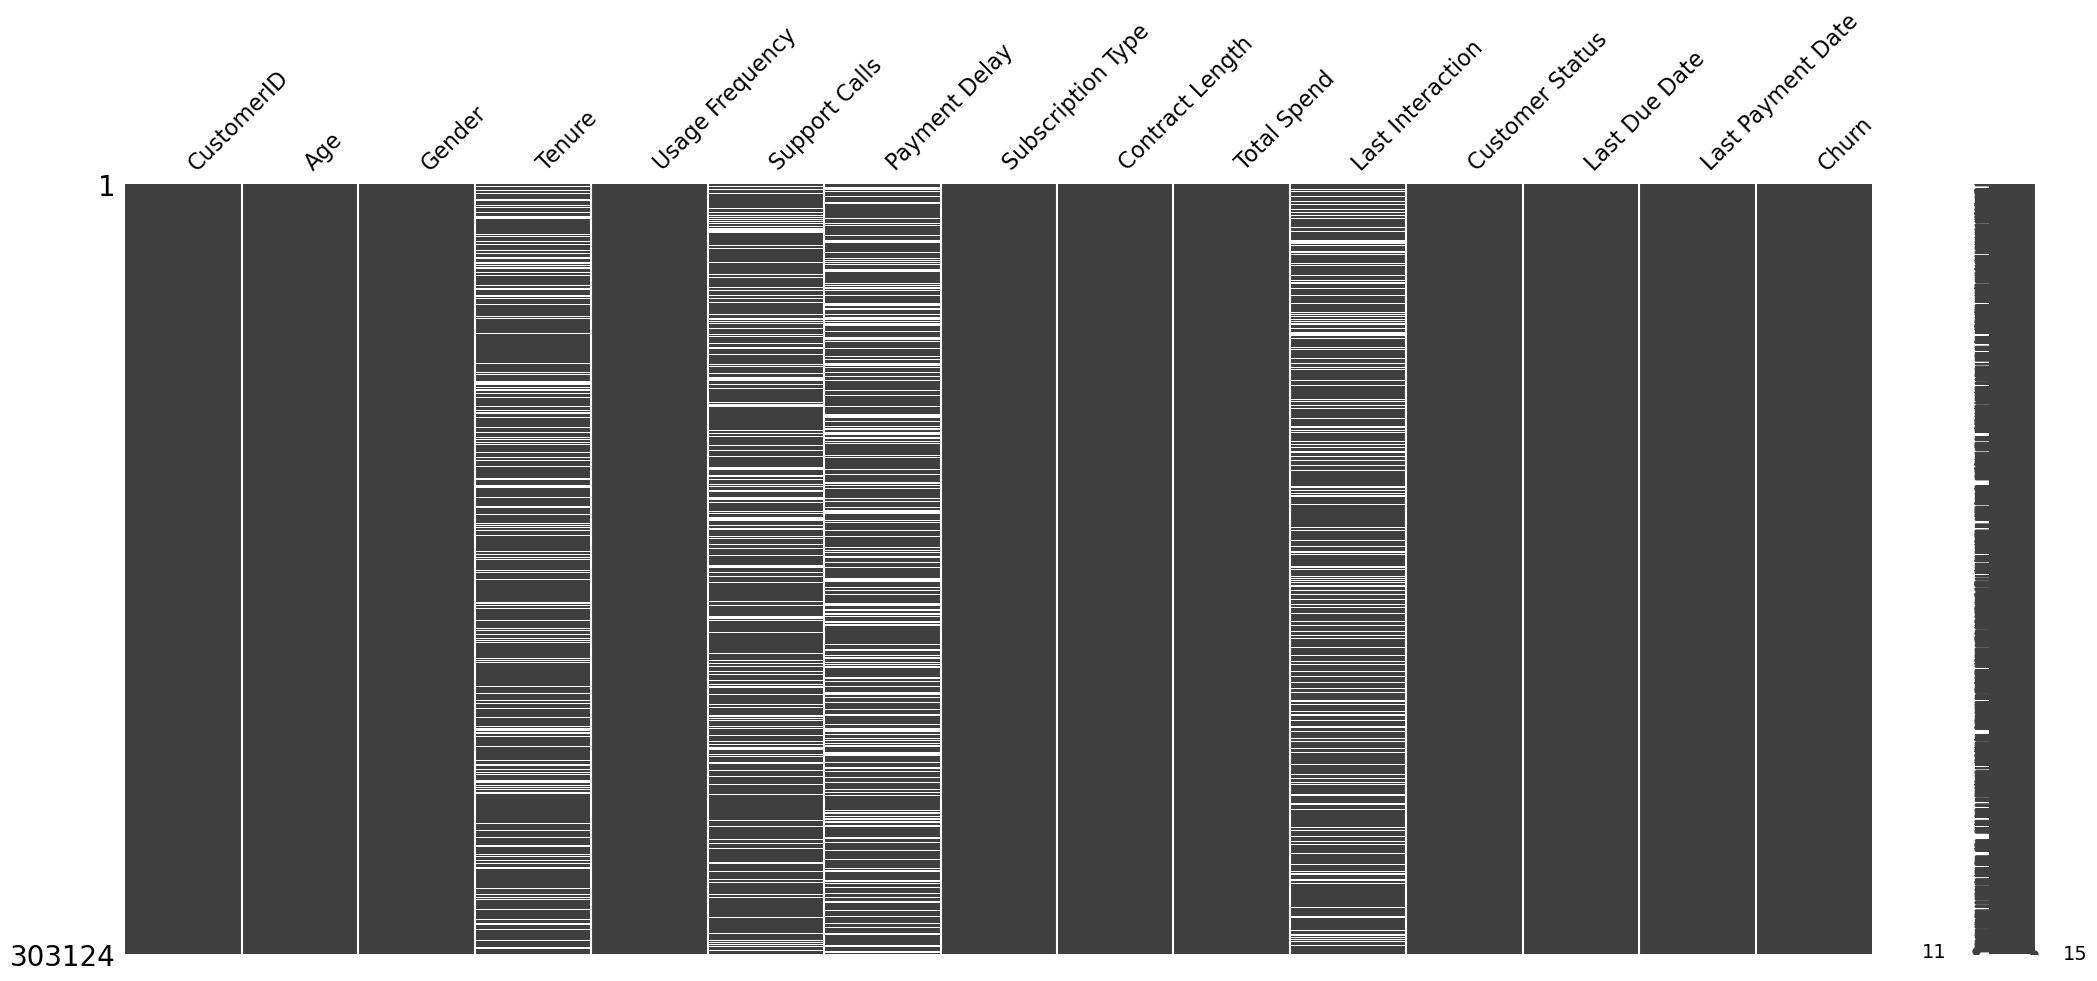

In [5]:
import missingno as msno

print(churn_train.describe())
print(churn_train.info())
print(churn_train.shape)
churn_train.head()
print(churn_train.describe)



msno.bar(churn_train)        # bar of null counts
msno.matrix(churn_train)     # null matrix

null_counts = churn_train.isna().sum()



Handel Nan in tenure

In [6]:
import seaborn as sns
# churn_train['Tenure'].fillna("Missing", inplace= True)
# subset = churn_train[churn_train['Tenure'] == 'Missing']
# subset = subset.sort_values("Age")
# subset.shape
# print(subset)
# plt.figure(figsize=(14, 8), dpi=100)   # increase width/height and resolution

# sns.countplot(data = churn_train, x = "Churn", hue = "Churn")

## What's a good predictor of tenure?
## The distribution of Churn = 1 and = 0 appears the same as the whole data set so I will drop nulls

# churn_train.dropna(subset = ["Tenure"])

churn_train.dropna(subset = ["Age", "Tenure"], inplace= True)







In [7]:
print(churn_test.describe())

print(churn_test.shape)
churn_test.head()


          CustomerID            Age         Tenure  Usage Frequency  \
count  133776.000000  133776.000000  106578.000000    133776.000000   
mean   253147.694273      41.440632      31.169922        15.400229   
std    145702.951964      13.744837      17.277522         8.729192   
min         0.000000      18.000000       1.000000         1.000000   
25%    127106.750000      30.000000      16.000000         8.000000   
50%    253324.500000      41.000000      32.000000        15.000000   
75%    379358.500000      53.000000      46.000000        23.000000   
max    505204.000000      65.000000      60.000000        30.000000   

       Payment Delay    Total Spend  Last Interaction  
count  133776.000000  133776.000000     106581.000000  
mean       15.466085     622.968975         15.355776  
std         8.924996     391.534594          8.666067  
min         0.000000     100.000000          1.000000  
25%         8.000000     331.000000          8.000000  
50%        16.000000    

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Last Due Date,Last Payment Date,Customer Status
0,262106,65,Male,16.0,16,3,14,Standard,Monthly,853.00,4.0,06-21,07-05,active
1,37061,23,Male,NaN,12,3,6,Premium,Annual,860.00,21.0,06-03,06-09,active
2,361832,49,Male,NaN,25,2,4,Premium,Quarterly,905.58,15.0,06-13,06-17,active
3,425516,25,Female,48.0,11,7,16,Premium,Quarterly,446.00,8.0,06-14,06-30,active
4,60597,52,Female,4.0,10,6,3,Basic,Monthly,933.29,28.0,06-17,06-20,active


In [8]:
from sklearn.model_selection import train_test_split
# from MAT311 import load_data

X = churn_train[["Usage Frequency"]]
y = churn_train["Churn"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)



print(X_train.shape, y_train.shape)



(168772, 1) (168772,)


In [77]:
def encode_category(df:pd.DataFrame, column_name:str):
    original_columns = set(df.columns)
    dummies = pd.get_dummies(df, columns = [column_name], drop_first = True, prefix = column_name, dtype = int)
    new_cols = list(set(dummies.columns) - original_columns)
    # print(new_cols)
    return dummies, new_cols
#     return pd.get_dummies(df, columns=[column_name], \
#         drop_first=True, prefix=column_name, dtype=int),\
        

# # a = encode_category(churn_train, "Customer Status")
# # a.head()


In [89]:
def check_cols(churn_train, churn_test , features):
    new_features = []

    for feature in features:
        if feature == "Support Calls": #Still not general enough but works for this specific example
            churn_test["Support Calls"] = pd.to_numeric(churn_test[feature], errors='coerce')
            churn_train["Support Calls"] = pd.to_numeric(churn_train[feature], errors='coerce')
            new_features.append(feature)

        if not(pd.api.types.is_numeric_dtype(churn_train[feature])):
            churn_train, new = encode_category(churn_train, feature)
            churn_test, a = encode_category(churn_test, feature)
            print(new)
            print(a)
            new_features.extend(new)
        else:
            new_features.append(feature)
    return churn_train, churn_test, new_features

In [90]:
from MAT311.clean_data import clean_data_impute
churn_test = clean_data_impute(churn_test)
churn_train = clean_data_impute(churn_train)

# churn_train.isna().sum()
# churn_test.isna().sum()

In [92]:
a_train, a_test, new_features = check_cols(churn_train, churn_test, ["Customer Status"])

# a_train.columns
# a_train.columns
new_features

['Customer Status_inactive']
[]


['Customer Status_inactive']